# Facial Expression Classifier

- Mount drive

- Copy src directory from drive into current directory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp drive/MyDrive/FacialExpressionClassification/src -r .

#### Dependencies

In [4]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import torch
import torchvision         

import shutil
import os
import PIL
import copy
from sklearn.metrics import confusion_matrix

In [6]:
from src.data import make_dataset, load_dataset
from src.models import models, train_model, predict_model
from src.visualization import visualize
from src import helpers

#### Downloading and preparing data

Download dataset from Kaggle

In [8]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

! unzip challenges-in-representation-learning-facial-expression-recognition-challenge.zip

 95% 271M/285M [00:01<00:00, 178MB/s]
100% 285M/285M [00:01<00:00, 200MB/s]
Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


- Load dataset

- Display pandas df of data

- Display plot of labeled images for each emotion

   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...



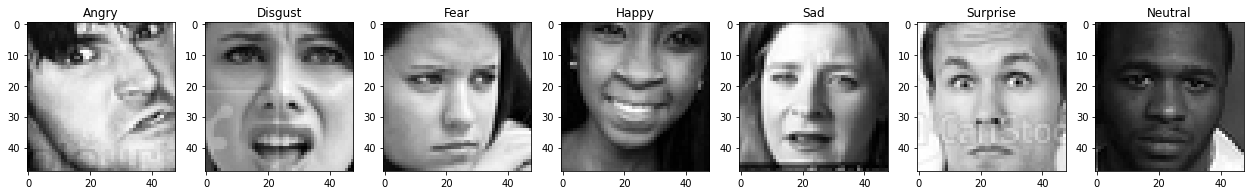

In [9]:
make_dataset.display_images()

- Create folders for data
- Filter dataset into training, validation, and testing data
- Convert given pixel values to PIL images
- Save PIL images to folders corresponding to each image label

In [10]:
make_dataset.prepare_data()

- Find normalization constants for training data
- Load images, apply transformations, convert to tensors, and normalize
- Define DataLoaders for training, validation, and testing data

In [11]:
data_loaders, validationTestDataTransforms = load_dataset.get_data_loaders()

## Model Architecture

Two model architectures are used

1) Custom CNN

2) Pretrained ResNet-50 

In [13]:
custom_facial_expression_model, custom_model_loss_fn, custom_model_optimizer = models.get_custom_model()

In [12]:
pretrained_facial_expression_model, pretrained_model_loss_fn, pretrained_model_optimizer = models.get_pretrained_model()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

## Training

Train custom model for 20 epochs

In [14]:
custom_model, _, _, _, _ = train_model.train_model(
    custom_facial_expression_model, data_loaders, custom_model_loss_fn, custom_model_optimizer, 20
)


Epoch 1
-------
Train
Loss: 1.8234   Acc: 24.3129
Validation
Loss: 1.7848   Acc: 24.9373


Epoch 2
-------
Train
Loss: 1.7869   Acc: 25.6749
Validation
Loss: 1.7162   Acc: 30.4263


Epoch 3
-------
Train
Loss: 1.7359   Acc: 28.7819
Validation
Loss: 1.6337   Acc: 32.4324


Epoch 4
-------
Train
Loss: 1.7083   Acc: 29.8791
Validation
Loss: 1.5705   Acc: 34.2992


Epoch 5
-------
Train
Loss: 1.6506   Acc: 32.8712
Validation
Loss: 1.5090   Acc: 39.8440


Epoch 6
-------
Train
Loss: 1.6006   Acc: 35.0482
Validation
Loss: 1.4011   Acc: 44.9150


Epoch 7
-------
Train
Loss: 1.5606   Acc: 37.9219
Validation
Loss: 1.3677   Acc: 46.9769


Epoch 8
-------
Train
Loss: 1.5357   Acc: 39.4371
Validation
Loss: 1.3455   Acc: 47.0326


Epoch 9
-------
Train
Loss: 1.5041   Acc: 41.2484
Validation
Loss: 1.3369   Acc: 47.9242


Epoch 10
-------
Train
Loss: 1.4884   Acc: 41.3703
Validation
Loss: 1.2993   Acc: 48.5651


Epoch 11
-------
Train
Loss: 1.4760   Acc: 42.8890
Validation
Loss: 1.2970   Acc: 49.3452

Custom model reaches validation accuracy of ~52%.

Train ResNet model for 40 epochs



In [15]:
pretrained_facial_expression_model, train_losses, train_accuracies, validation_losses, validation_accuracies = train_model.train_model(
    pretrained_facial_expression_model, data_loaders, pretrained_model_loss_fn, pretrained_model_optimizer, 40
)

Epoch 1
-------
Train
Loss: 1.6829   Acc: 32.1397
Validation
Loss: 1.4078   Acc: 46.0853


Epoch 2
-------
Train
Loss: 1.4494   Acc: 43.6832
Validation
Loss: 1.2419   Acc: 52.2151


Epoch 3
-------
Train
Loss: 1.3462   Acc: 48.3542
Validation
Loss: 1.1843   Acc: 54.5556


Epoch 4
-------
Train
Loss: 1.2826   Acc: 51.1617
Validation
Loss: 1.1605   Acc: 56.5339


Epoch 5
-------
Train
Loss: 1.2496   Acc: 52.2728
Validation
Loss: 1.1378   Acc: 56.7010


Epoch 6
-------
Train
Loss: 1.2087   Acc: 54.2513
Validation
Loss: 1.0937   Acc: 59.2923


Epoch 7
-------
Train
Loss: 1.1781   Acc: 55.1360
Validation
Loss: 1.0774   Acc: 59.4316


Epoch 8
-------
Train
Loss: 1.1579   Acc: 55.8884
Validation
Loss: 1.0973   Acc: 59.4595


Epoch 9
-------
Train
Loss: 1.1381   Acc: 56.7871
Validation
Loss: 1.0479   Acc: 61.3541


Epoch 10
-------
Train
Loss: 1.1222   Acc: 57.3026
Validation
Loss: 1.0408   Acc: 61.3820


Epoch 11
-------
Train
Loss: 1.1046   Acc: 58.1351
Validation
Loss: 1.0523   Acc: 60.9083

Save the model's best performing parameters

In [16]:
helpers.save_model(pretrained_facial_expression_model)

## Results

- Plot training and validation losses
- Plot training and validation accuracies

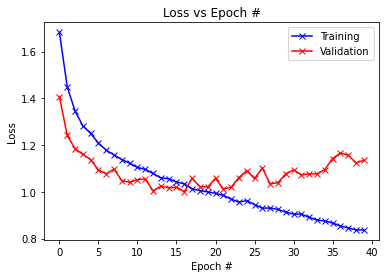

In [17]:
visualize.plot_losses(train_losses, validation_losses)

It seems that the model is overfitting after ~20 epochs

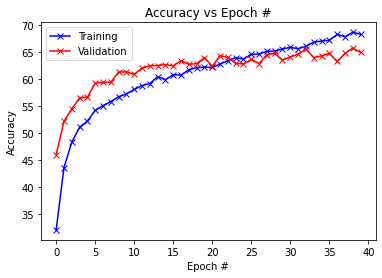

In [18]:
visualize.plot_accuracies(train_accuracies, validation_accuracies)

- Calculate model accuracy on test data
- Display confusion matrix

In [30]:
incorrect_predictions, true_and_predicted_labels = predict_model.calculate_accuracy(pretrained_facial_expression_model)


FINAL RESULTS
Model accuracy on test data: 65.4779%


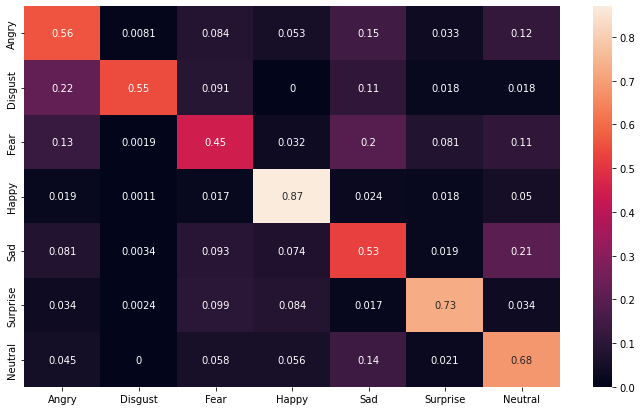

In [31]:
visualize.display_confusion(true_and_predicted_labels)

Confusion Matrix Takeaways

Model performs best classifying happy faces, and worst classifying fearful ones.

Common misclassifications:

Angry mistaken for sad
Disgust mistaken for angry and sad
Fear mistaken for angry and sad
Sad mistaken for neutral and vice versa


Display incorrect predictions


Prediction: Surprise
Label: Fear


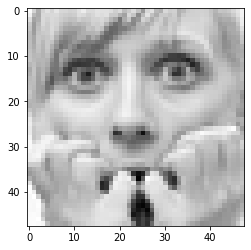

Prediction: Sad
Label: Neutral


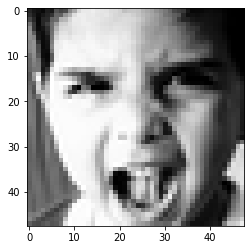

Prediction: Sad
Label: Neutral


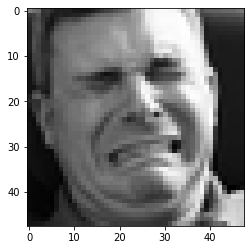

Prediction: Fear
Label: Surprise


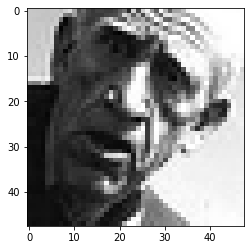

Prediction: Angry
Label: Sad


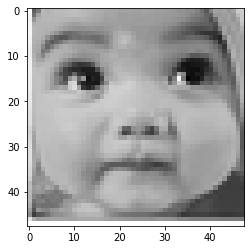

Prediction: Happy
Label: Neutral


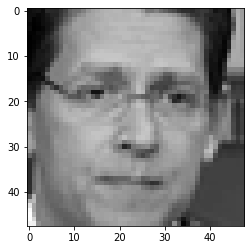

Prediction: Neutral
Label: Angry


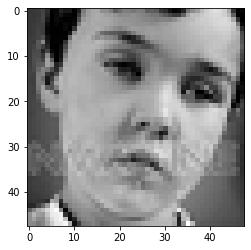

Prediction: Angry
Label: Neutral


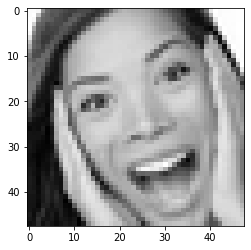

Prediction: Sad
Label: Happy


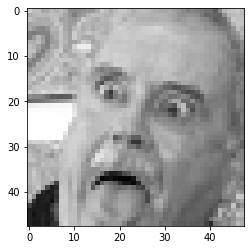

Prediction: Fear
Label: Surprise


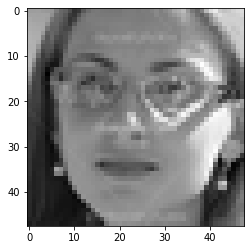

In [29]:
visualize.display_incorrect(incorrect_predictions)

It seems that some of these images have either been mislabeled or the emotions shown are hard to classify with the human eye.

Personal test

Predict the emotions for some personally uploaded images.

Happy


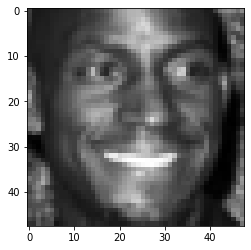

Angry


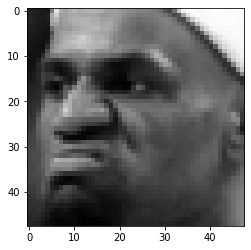

Neutral


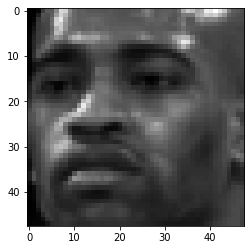

Disgust


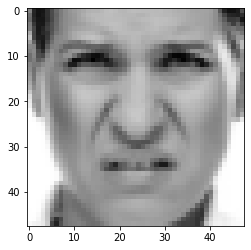

Fear


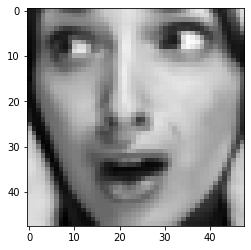

Angry


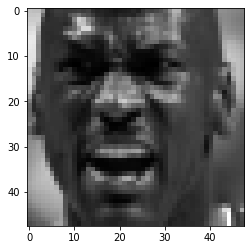

Angry


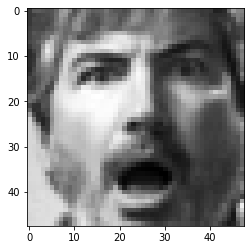

In [ ]:
visualize.display_personal_test(pretrained_facial_expression_model, validationTestDataTransforms)